Two One-Sided Tests (TOST) Results:

Species: H.sap
Equivalence (max) p-value: 0.0000

Species: M.mus
Equivalence (max) p-value: 0.0000

Species: D.mel
Equivalence (max) p-value: 0.0000

Species: A.tha
Equivalence (max) p-value: 0.0000



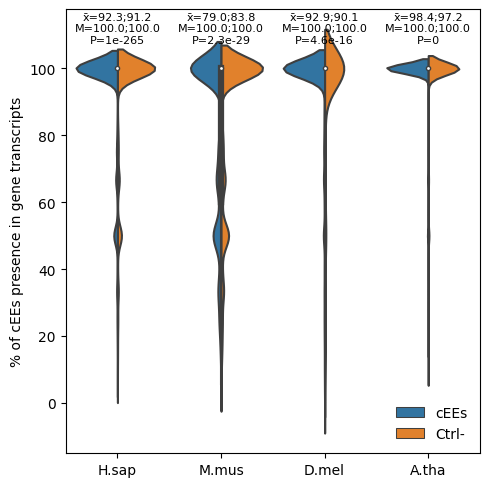

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import matplotlib.ticker as ticker
matplotlib.rcParams['pdf.fonttype'] = 42
from statsmodels.stats.weightstats import ttost_ind

# Load Data
df1 = pd.read_csv("/home/mouren/Data/revisions/splicing_exons/1_prevalence_in_transcripts/ee_abundance_hg38.tsv", sep="\t")
df1["Species"] = "H.sap"
df1["Group"] = "cEEs"

df2 = pd.read_csv("/home/mouren/Data/revisions/splicing_exons/1_prevalence_in_transcripts/neg_abundance_hg38.tsv", sep="\t")
df2["Species"] = "H.sap"
df2["Group"] = "Ctrl-"

df5 = pd.read_csv("/home/mouren/Data/revisions/splicing_exons/1_prevalence_in_transcripts/ee_abundance_mm39.tsv", sep="\t")
df5["Species"] = "M.mus"
df5["Group"] = "cEEs"

df6 = pd.read_csv("/home/mouren/Data/revisions/splicing_exons/1_prevalence_in_transcripts/neg_abundance_mm39.tsv", sep="\t")
df6["Species"] = "M.mus"
df6["Group"] = "Ctrl-"

df7 = pd.read_csv("/home/mouren/Data/revisions/splicing_exons/1_prevalence_in_transcripts/ee_abundance_dm6.tsv", sep="\t")
df7["Species"] = "D.mel"
df7["Group"] = "cEEs"

df8 = pd.read_csv("/home/mouren/Data/revisions/splicing_exons/1_prevalence_in_transcripts/neg_abundance_dm6.tsv", sep="\t")
df8["Species"] = "D.mel"
df8["Group"] = "Ctrl-"

df9 = pd.read_csv("/home/mouren/Data/revisions/splicing_exons/1_prevalence_in_transcripts/ee_abundance_tair10.tsv", sep="\t")
df9["Species"] = "A.tha"
df9["Group"] = "cEEs"

df10 = pd.read_csv("/home/mouren/Data/revisions/splicing_exons/1_prevalence_in_transcripts/neg_abundance_tair10.tsv", sep="\t")
df10["Species"] = "A.tha"
df10["Group"] = "Ctrl-"

# Combine datasets
combined_df = pd.concat([df1, df2, df5, df6, df7, df8, df9, df10])

species_list = combined_df['Species'].unique()

# Perform TOST test to show statistical similarity between EE and Ctrl- for each species
tost_results = {}
print("Two One-Sided Tests (TOST) Results:\n")
for species in species_list:
    ee_data = combined_df[(combined_df['Species'] == species) & (combined_df['Group'] == 'cEEs')]['Abundance']
    ctrl_data = combined_df[(combined_df['Species'] == species) & (combined_df['Group'] == 'Ctrl-')]['Abundance']

    # TOST for equivalence with ±5 units as equivalence margin (modify as needed)
    ctrl_mean = ctrl_data.mean()
    equivalence_margin_ctrl = 0.1 * ctrl_mean  
    ee_mean = ee_data.mean()
    equivalence_margin_ee = 0.1 * ee_mean  
    equivalence_margin = (equivalence_margin_ctrl+equivalence_margin_ee)/2 # 10% of group mean; biologically relative threshold that scales with the data.

    lower_bound, upper_bound = -equivalence_margin, equivalence_margin

    pval_equiv, pval_lower, pval_upper = ttost_ind(ee_data, ctrl_data, low=lower_bound, upp=upper_bound, usevar='unequal')

    print(f"Species: {species}")
    print(f"Equivalence (max) p-value: {pval_equiv:.4f}\n")

    tost_results[species] = {
        "mean_ee": ee_data.mean(),
        "mean_ctrl": ctrl_data.mean(),
        "median_ee": ee_data.median(),
        "median_ctrl": ctrl_data.median(),
        "pval": pval_equiv
    }

plt.figure(figsize=(5, 5))
ax = sns.violinplot(data=combined_df, x='Species', y='Abundance', hue='Group', split=True)
plt.ylabel('% of cEEs presence in gene transcripts')
plt.xlabel(None)
plt.legend(frameon=False,loc="lower right")


# Add annotations
species_pos = ax.get_xticks()
for i, species in enumerate(species_list):
    res = tost_results[species]
    text = f"x̄={res['mean_ee']:.1f};{res['mean_ctrl']:.1f}\nM={res['median_ee']:.1f};{res['median_ctrl']:.1f}\nP={res['pval']:.2g}"
    y_max = combined_df[combined_df['Species'] == species]['Abundance'].max()
    ax.text(species_pos[i], y_max + 7, text, ha='center', va='bottom', fontsize=8, color='black')

plt.tight_layout()

plt.savefig("/home/mouren/Images/tls1/revisions/rev_1_pt3_supp7_new.pdf", format="pdf", bbox_inches="tight", dpi=450)
plt.savefig("/home/mouren/Images/tls1/revisions/rev_1_pt3_supp7_new.png", format="png", bbox_inches="tight", dpi=450)

plt.show()